In [2]:
pip install torch

You should consider upgrading via the '/Users/seonghak/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.4 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/seonghak/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Pytorch Data Preprocess

In [1]:
import torch
from torchvision import datasets, transforms

## Data Loader 부르기

In [2]:
batch_size = 32
test_batch_size = 32

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train = True,download = True,
                 transform = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Normalize(mean = (0.5,), std = (0.5,))
                 ])),
    batch_size = batch_size,
    shuffle = True)

9913344it [00:01, 8316150.19it/s]                              


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



29696it [00:00, 1677066.50it/s]          


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



1649664it [00:00, 2486999.17it/s]                             


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



5120it [00:00, 572326.54it/s]           

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [4]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset',train=False,
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,), (0,5))
                  ])),
    batch_size = test_batch_size,
    shuffle = True)

## 첫번째 iteration에서 나오는 데이터 확인

In [5]:
images, labels = next(iter(train_loader))

In [6]:
images.shape 
# tensorflow에서는  (batch_size, height, width, channel) - (32, 28, 28, 1)
# pytorch에서는  (batch_size, channel, height, width) - (32, 1, 28, 28)
# rgb였으면 1이 아니라 3
# pytorch와 tensorflow의 차이점 !!

torch.Size([32, 1, 28, 28])

In [7]:
labels.shape

torch.Size([32])

## 데이터 시각화

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [12]:
image = torch_image.numpy()
image.shape

(28, 28)

In [13]:
label = labels[0].numpy()

In [14]:
label.shape

()

In [15]:
label

array(4)

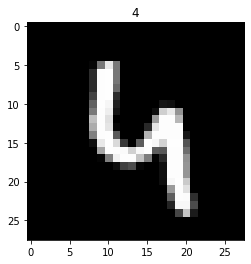

In [16]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()